In [1]:
import cv2
import matplotlib.pyplot as plt

import numpy as np

In [2]:
import sys

sys.path.append("../remx/utils")

from images import (
    letterbox,
    ImgSize,
    img_resize,
    inverse_letterbox_coordinate_transform,
)

In [3]:
img = cv2.imread("../datasets/test/elephant-2.jpg")
img_letterboxed = letterbox(np.asarray(img), ImgSize(640, 640))


# Save the image
cv2.imwrite("../datasets/test/elephant-5.jpg", img_letterboxed)

[ WARN:0@0.233] global loadsave.cpp:248 findDecoder imread_('../datasets/test/elephant-2.jpg'): can't open/read file: check file path/integrity


IndexError: tuple index out of range

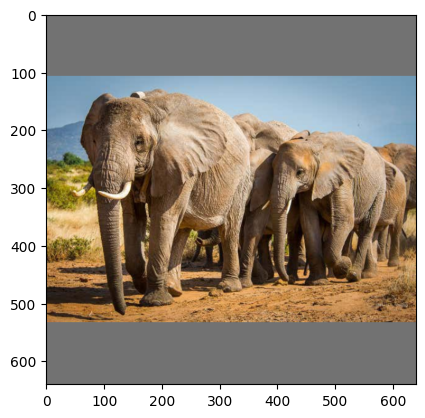

In [ ]:
# One common reason for this issue is the ordering of color channels.
# OpenCV uses BGR (Blue, Green, Red) channel order by default,
# while Matplotlib uses RGB (Red, Green, Blue) order.
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_letterboxed = letterbox(np.asarray(img_rgb), ImgSize(640, 640))
plt.imshow(img_letterboxed)

To map a point from the img_letterboxed image to the original image, you can use the following formula:

x_original = (x_letterboxed - pad_w) \* original_width / letterboxed_width

y_original = (y_letterboxed - pad_h) \* original_height / letterboxed_height


<function matplotlib.pyplot.show(close=None, block=None)>

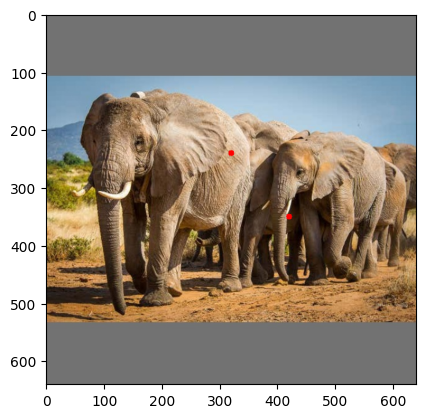

In [ ]:
# Load the image
img = cv2.imread("../datasets/test/elephant-5.jpg")

letterboxed_size = (img_letterboxed.shape[1], img_letterboxed.shape[0])
original_size = (img.shape[1], img.shape[0])
# Define the x,y coordinate of the point
x1, y1 = 320, 240
x2, y2 = 420, 350

# Draw a circle at the specified point
cv2.circle(img, (x1, y1), 5, (0, 0, 255), -1)
cv2.circle(img, (x2, y2), 5, (0, 0, 255), -1)


# Display the letterboxed image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

[(300, 125, 394, 228)]


<function matplotlib.pyplot.show(close=None, block=None)>

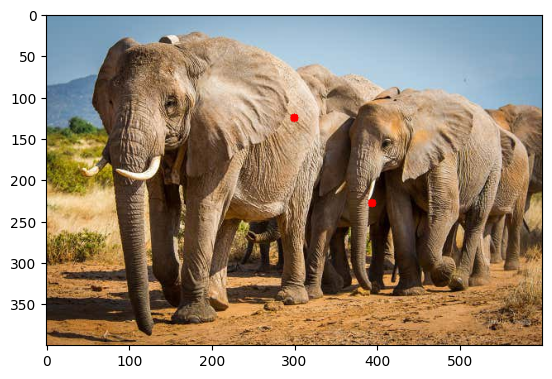

In [ ]:
# Load the image
img = cv2.imread("../datasets/test/elephant-2.jpg")

# Define the x,y coordinate of the point
# x, y = (300, 125)
coordinates = inverse_letterbox_coordinate_transform(
    # [(x1, y1, x2, y2)]
    [(320, 240, 420, 350)],
    ImgSize(img.shape[1], img.shape[0]),
    ImgSize(640, 640),
)

print(coordinates)

x1 = coordinates[0][0]
y1 = coordinates[0][1]

x2 = coordinates[0][2]
y2 = coordinates[0][3]

# print(round(5 * (400 / 600))) # to make size of point to the letterbox
# Draw a circle at the specified point
cv2.circle(img, (x1, y1), 5, (0, 0, 255), -1)
cv2.circle(img, (x2, y2), 5, (0, 0, 255), -1)

# Display the letterboxed image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

In [4]:
import sys

sys.path.append("../remx/utils")

from images_predict_fn import (
  load_images
)

In [5]:
load_images("./datasets")

./datasets/elephant/test-elephant.jpg
./datasets/axis-deer/test-axis-deer.jpg


In [13]:

from typing import List, Tuple
BBox = Tuple[float, float, float, float]  # (x1, y1, x2, y2) for single bounding box

class ImgSize:
    def __init__(self, width: int, height: int, channel: int = 3) -> None:
        self.height = height
        self.width = width
        self.channel = channel

    def get_tuple(self) -> tuple:
        return (self.width, self.height, self.channel)



def letterbox_coordinate_transform(bboxes: List[BBox], original_size: ImgSize, letterboxed_size: ImgSize) -> List[BBox]:
    # Calculate the aspect ratio of the original and letterboxed sizes
    aspect_ratio = min(
        letterboxed_size.height / original_size.width,
        letterboxed_size.width / original_size.height,
    )

    # Calculate the amount of padding added during the letterbox operation
    pad_w = letterboxed_size.width - (aspect_ratio * original_size.width)
    pad_h = letterboxed_size.height - (aspect_ratio * original_size.height)

    # Convert the bounding box coordinates to the letterboxed image dimensions
    letterboxed_bboxes = []
    for bbox in bboxes:
        x1, y1, x2, y2 = bbox
        # (x1, y1) is the top-left corner of single bounding box
        map_x1 = round((x1 + pad_w / (2 * aspect_ratio)) * aspect_ratio)
        map_y1 = round((y1 + pad_h / (2 * aspect_ratio)) * aspect_ratio)

        # (x2, y2) is the bottom-right corner of single bounding box
        map_x2 = round((x2 + pad_w / (2 * aspect_ratio)) * aspect_ratio)
        map_y2 = round((y2 + pad_h / (2 * aspect_ratio)) * aspect_ratio)
        letterboxed_bboxes.append((map_x1, map_y1, map_x2, map_y2))
    return letterboxed_bboxes


In [14]:
bboxes = letterbox_coordinate_transform(bboxes=[(256, 390, 950, 902)], original_size=ImgSize(2048, 1536), letterboxed_size=ImgSize(640, 640))
bboxes

[(80, 202, 297, 362)]